In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
import math
import numpy as np
import matplotlib.dates as mdates

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [3]:
df = pd.read_excel(
    'C:/Users/海棠微雨/Desktop/C题/附件1.xlsx',
    sheet_name='Sheet1',
    header=0,  # 第一行作为列名
    usecols='A:D',  # 读取 A 到 D 列
    index_col=None,  # 第一列作为行索引
    skiprows=0,  # 不跳过
    nrows=None  # 读取所有 行
)
df1 = pd.read_excel(
    'C:/Users/海棠微雨/Desktop/C题/附件2.xlsx',
    sheet_name='Sheet1',
    header=0,  # 第一行作为列名
    usecols='A:G',  # 读取 A 到 G 列
    index_col=None,  # 第一列作为行索引
    skiprows=0,  # 不跳过
    nrows=None  # 读取所有 行
)

In [4]:
def creat_dict(j, List):
    Dict = {}
    seen = set()
    for i in List:
        Key = str(i)
        if Key[:j] not in seen:
            Dict[Key[:j]] = [[], [], [], [], [], []]  # 你可以把对应的值设置为任意值
            seen.add(Key[:j])
    return Dict

In [5]:
encoder = df['单品编码']
name = df['分类名称']
# 使用 zip() 函数将两个列表合并为一个字典
my_dict = dict(zip(encoder, name))
encoder1 = list(df1['单品编码'])
date = list(df1['销售日期'])
sales = list(df1['销量(千克)'])
sales_type = list(df1['销售类型'])

# 使用列表推导式过滤数据
encoder1 = [e for i, e in enumerate(encoder1) if sales_type[i] != '退货']
date = [d for i, d in enumerate(date) if sales_type[i] != '退货']
sales = [s for i, s in enumerate(sales) if sales_type[i] != '退货']
sales_type = [t for t in sales_type if t != '退货']
length = len(date)

A, B, C, D, E, F = '花叶类', '花菜类', '辣椒类', '茄类', '食用菌', '水生根茎类'

In [6]:
date_dict = creat_dict(10, date)
for i in range(length):
    if my_dict[encoder1[i]] == '花叶类':
        date_dict[str(date[i])[:10]][0].append(sales[i])
    elif my_dict[encoder1[i]] == '花菜类':
        date_dict[str(date[i])[:10]][1].append(sales[i])
    elif my_dict[encoder1[i]] == '辣椒类':
        date_dict[str(date[i])[:10]][2].append(sales[i])
    elif my_dict[encoder1[i]] == '茄类':
        date_dict[str(date[i])[:10]][3].append(sales[i])
    elif my_dict[encoder1[i]] == '食用菌':
        date_dict[str(date[i])[:10]][4].append(sales[i])
    elif my_dict[encoder1[i]] == '水生根茎类':
        date_dict[str(date[i])[:10]][5].append(sales[i])

In [7]:
date_dict1 = creat_dict(10, date)
for i, j in zip(date_dict.values(), date_dict1.values()):
    for k, v in zip(i, j):
        v.append(math.fsum(k))

In [20]:
data_A, data_B, data_C, data_D, data_E, data_F = [], [], [], [], [], []
for i in date_dict1.values():
    data_A.append(i[0][0])
    data_B.append(i[1][0])
    data_C.append(i[2][0])
    data_D.append(i[3][0])
    data_E.append(i[4][0])
    data_F.append(i[5][0])

A, B, C, D, E, F = '花叶类', '花菜类', '辣椒类', '茄类', '食用菌', '水生根茎类'

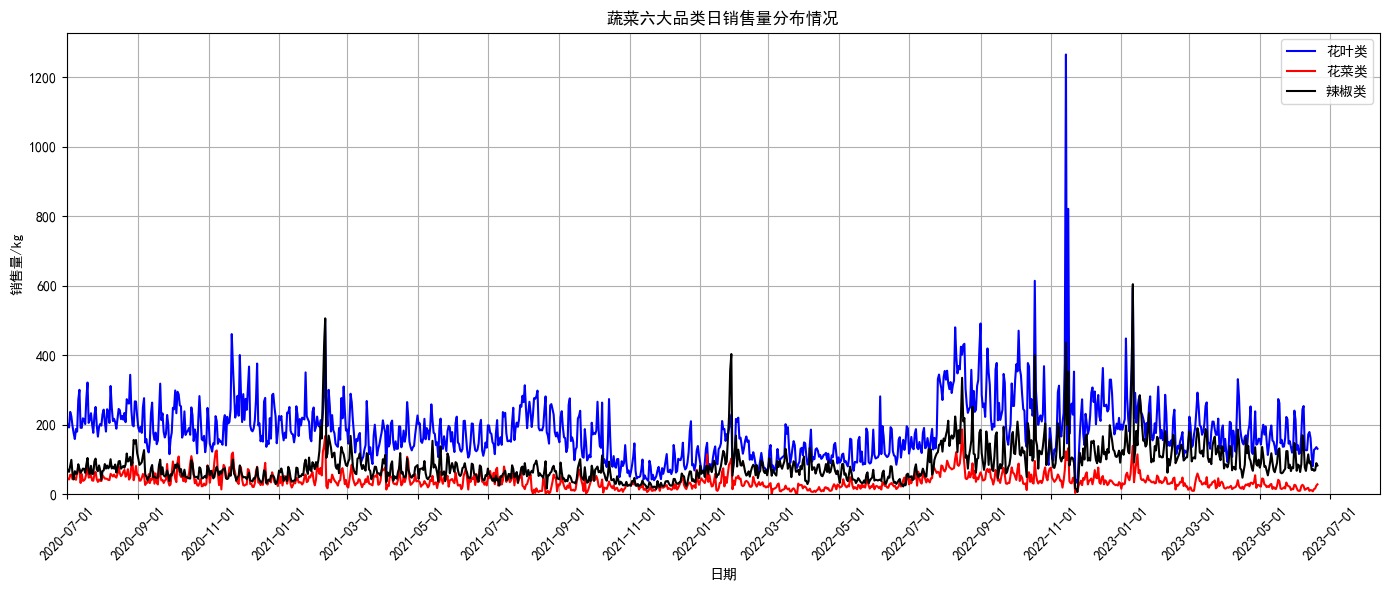

In [37]:

# Sample data
dates = pd.date_range(start="2020-07-01", end="2023-07-01", freq='D')

# 确保数据和日期长度一致
min_length = min(len(dates), len(data_A), len(data_B), len(data_C))
dates = dates[:min_length]
data_A = data_A[:min_length]
data_B = data_B[:min_length]
data_C = data_C[:min_length]

# Plotting the data
plt.figure(figsize=(14, 6))
plt.plot(dates, data_A, color='blue', label='花叶类')
plt.plot(dates, data_B, color='red', label='花菜类')
plt.plot(dates, data_C, color='black', label='辣椒类')

# Adding labels and title
plt.xlabel('日期')
plt.ylabel('销售量/kg')
plt.title('蔬菜六大品类日销售量分布情况')
plt.legend()

# Format X-axis with dates and rotate labels
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


# 设置X轴从2020-07-01开始
plt.xlim(left=pd.Timestamp('2020-07-01'))
# 设置Y轴从0开始
plt.ylim(bottom=0)

# Optimize x-axis and y-axis limits to avoid clipping
plt.tight_layout()

# Show grid
plt.grid(True)

# Display the plot
plt.show()
